## 1. Import required libraries and read the dataset.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [2]:
df = pd.read_csv('loan_approval_data.csv')
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [3]:
df.sample(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
430,lp002377,female,no,1.0,graduate,yes,8624,0.0,150.0,360.0,1.0,semiurban,y
475,lp002527,male,yes,2.0,graduate,yes,16525,1014.0,150.0,360.0,1.0,rural,y
472,lp002519,male,yes,3.0,graduate,no,4691,0.0,100.0,360.0,1.0,semiurban,y
333,lp002101,male,yes,0.0,graduate,NaN,63337,0.0,490.0,180.0,1.0,urban,y
31,lp001095,male,no,0.0,graduate,no,3167,0.0,74.0,360.0,1.0,urban,n


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [6]:
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
applicantincome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
coapplicantincome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
loanamount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
loan_amount_term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
credit_history,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


## 3. Check for missing values in the dataset, if present? Handle them with appropriate methods and Drop redundant features.

In [8]:
df.isnull().sum()/len(df)*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [9]:
df["gender"].fillna(df['gender'].mode()[0], inplace = True)
df['married'].fillna(df['married'].mode()[0], inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)

df['dependents'].fillna(0.0, inplace=True)
df['loanamount'].fillna(df['loanamount'].median(), inplace=True)
df['loan_amount_term'].fillna(df['loan_amount_term'].median(), inplace=True)
df['credit_history'].fillna(1.0, inplace=True)

In [10]:
df.isnull().sum().sum()

0

#### Dropping the feature 'Loan ID'

In [11]:
df.drop('loan_id',axis=1,inplace=True)

In [12]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0.0,graduate,no,5849,0.0,128.0,360.0,1.0,urban,y
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [13]:
df['dependents'] = df['dependents'].astype(int)
df['credit_history'] = df['credit_history'].astype(int)
df['loan_amount_term'] = df['loan_amount_term'].astype(int)
df['coapplicantincome'] = df['coapplicantincome'].astype(int)
df['loanamount'] = (df['loanamount'] * 1000).astype(int)

In [14]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0,graduate,no,5849,0,128000,360,1,urban,y
1,male,yes,1,graduate,no,4583,1508,128000,360,1,rural,n
2,male,yes,0,graduate,yes,3000,0,66000,360,1,urban,y
3,male,yes,0,not graduate,no,2583,2358,120000,360,1,urban,y
4,male,no,0,graduate,no,6000,0,141000,360,1,urban,y


## 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations. 

In [15]:
# loan status by gender
crosstab = pd.crosstab(df['gender'], df['loan_status'])
crosstab

loan_status,n,y
gender,,
female,37,75
male,155,347


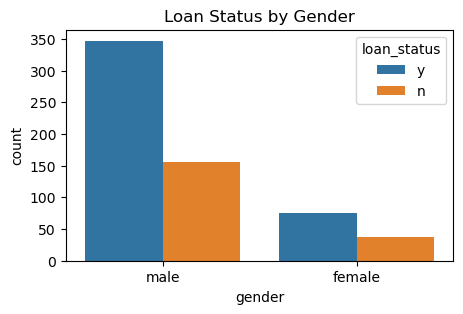

In [16]:
plt.figure(figsize=(5,3))
sns.countplot(x='gender', hue='loan_status', data=df)
plt.title('Loan Status by Gender')
plt.show()

In [17]:
# loan status by married
crosstab = pd.crosstab(df['married'], df['loan_status'])
crosstab

loan_status,n,y
married,,
no,79,134
yes,113,288


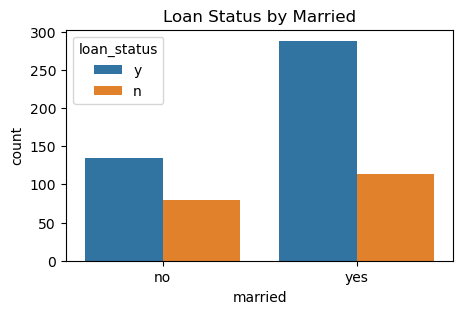

In [18]:
plt.figure(figsize=(5,3))

sns.countplot(x='married', hue='loan_status', data=df)
plt.title('Loan Status by Married')
plt.show()

In [19]:
# loan status by education
crosstab = pd.crosstab(df['education'], df['loan_status'])
crosstab

loan_status,n,y
education,,
graduate,140,340
not graduate,52,82


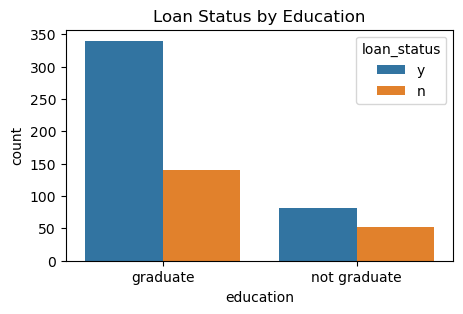

In [20]:
plt.figure(figsize=(5,3))

sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Loan Status by Education')
plt.show()

In [21]:
# Loan Status by Self Employed
crosstab = pd.crosstab(df['self_employed'], df['loan_status'])
crosstab

loan_status,n,y
self_employed,,
no,166,366
yes,26,56


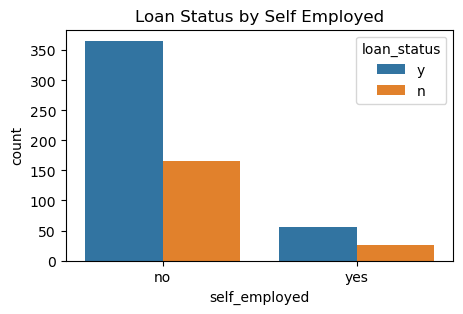

In [22]:
plt.figure(figsize=(5,3))

sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.title('Loan Status by Self Employed')
plt.show()

In [23]:
# Loan Status by Property Area
crosstab = pd.crosstab(df['property_area'], df['loan_status'])
crosstab

loan_status,n,y
property_area,,
rural,69,110
semiurban,54,179
urban,69,133


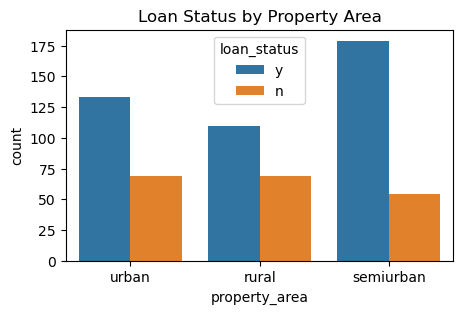

In [24]:
plt.figure(figsize=(5,3))

sns.countplot(x='property_area', hue='loan_status', data=df)
plt.title('Loan Status by Property Area')
plt.show()

In [25]:
data = df.copy()

## 5. Encode the categorical data.

In [26]:
label = LabelEncoder()
columns_encode = df.select_dtypes(include=['object']).columns
for column in columns_encode:
    df[column] = label.fit_transform(df[column])

In [27]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0,128000,360,1,2,1
1,1,1,1,0,0,4583,1508,128000,360,1,0,0
2,1,1,0,0,1,3000,0,66000,360,1,2,1
3,1,1,0,1,0,2583,2358,120000,360,1,2,1
4,1,0,0,0,0,6000,0,141000,360,1,2,1


In [28]:
df_counts = df['gender'].value_counts()
data_counts = data['gender'].value_counts()
print(df_counts)
print(data_counts)

1    502
0    112
Name: gender, dtype: int64
male      502
female    112
Name: gender, dtype: int64


In [29]:
df_counts = df['married'].value_counts()
data_counts = data['married'].value_counts()
print(df_counts)
print(data_counts)

1    401
0    213
Name: married, dtype: int64
yes    401
no     213
Name: married, dtype: int64


In [30]:
df_counts = df['education'].value_counts()
data_counts = data['education'].value_counts()
print(df_counts)
print(data_counts)

0    480
1    134
Name: education, dtype: int64
graduate        480
not graduate    134
Name: education, dtype: int64


In [31]:
df_counts = df['self_employed'].value_counts()
data_counts = data['self_employed'].value_counts()
print(df_counts)
print(data_counts)

0    532
1     82
Name: self_employed, dtype: int64
no     532
yes     82
Name: self_employed, dtype: int64


In [32]:
df_counts = df['property_area'].value_counts()
data_counts = data['property_area'].value_counts()
print(df_counts)
print(data_counts)

1    233
2    202
0    179
Name: property_area, dtype: int64
semiurban    233
urban        202
rural        179
Name: property_area, dtype: int64


## 6. Separate the target and independent features and split the data into train and test. 

In [33]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [35]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(429, 11) (185, 11)
(429,) (185,)


In [36]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

## 7. Build any classification model to predict the loan status of the customer and save your model using pickle.

In [37]:
rf = RandomForestClassifier()

model = rf.fit(X_train,y_train)

test_predictions = model.predict(X_test)

test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)


print("Test Accuracy = " , test_accuracy)
print("Test F1 Score = " , test_f1)
print("Test Precision = " , test_precision)
print("Test Recall = " , test_recall)


Test Accuracy =  0.772972972972973
Test F1 Score =  0.8432835820895523
Test Precision =  0.773972602739726
Test Recall =  0.9262295081967213


Based on the above scores, we can say that the model has a high recall but comparatively lower precision. This means that the model is able to identify the positives well (low false negatives) but it also predicts more false positives leading to lower precision score.

In [38]:
import pickle
pickle.dump(rf, open('model.pkl','wb'))
print('Model Created!')

Model Created!
